# **4. Neural Network Model Design:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

# Print the keys of the dataset
print(mnist.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [12]:
X, y = mnist["data"], mnist["target"]

# Print the shape of the feature matrix (X)
print(X.shape)

(70000, 784)


In [13]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
print(X_train_full.shape)

(52500, 784)


In [ ]:
print(X_train.shape)

(39375, 784)


In [ ]:
print(X_valid.shape)

(13125, 784)


In [14]:
import numpy as np

# Reshape training data
X_train = X_train.values.astype('float32')

# Reshape validation data
X_valid = X_valid.values.astype('float32')

# Normalize training data
X_train /= 255

# Normalize validation data
X_valid /= 255
X_test /= 255

# Define number of classes
n_classes = 10

# Convert training labels to one-hot encoding
y_train = to_categorical(y_train, 10)

# Convert validation and testing labels to one-hot encoding
y_valid = to_categorical(y_valid, n_classes)
y_test = to_categorical(y_test, n_classes)

In [15]:
print(X_train_full.shape)

(52500, 784)


### **Design and implement multiple neural network architectures for handwritten digit recognition.**

**Simple model**

In [45]:
simple_model1 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

simple_model2 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])
simple_model3 = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

### **Train each neural network model on the MNIST dataset and evaluate its performance and report overfitting.**

In [48]:
# Assemble models
simple_model = [simple_model1, simple_model2, simple_model3]
for model in simple_model:
    model.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy

# Training models
# Evaluate each model and compare the results
simple_model_history_dict = {}
simple_model_best_accuracy = 0
simple_model_best_model_index = 0

for i, model in enumerate(simple_model, start=1):
    print(f"Training model {i}")
    history = model.fit(X_train, y_train,
                        epochs=20,
                        verbose=1,
                        validation_data=(X_valid, y_valid))

    simple_model_history_dict[f'model_{i}'] = history.history

    # Find the maximum validation accuracy for this model
    max_val_accuracy = max(history.history['val_accuracy'])
    print(f"Maximum validation accuracy for Model {i}: {max_val_accuracy}")

    # Compare to find the best model
    if max_val_accuracy > simple_model_best_accuracy:
        simple_model_best_accuracy = max_val_accuracy
        simple_model_best_model_index = i

# Print the best model information
print("")
print("==================================================")
print(f"The best model is Model {simple_model_best_model_index} with a validation accuracy of {simple_model_best_accuracy}")

Training model 1
Epoch 1/20
1231/1231 [==============================] - 9s 5ms/step - loss: 0.0719 - accuracy: 0.9772 - val_loss: 0.1089 - val_accuracy: 0.9683
Epoch 2/20
1231/1231 [==============================] - 6s 5ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.1048 - val_accuracy: 0.9701
Epoch 3/20
1231/1231 [==============================] - 6s 5ms/step - loss: 0.0556 - accuracy: 0.9812 - val_loss: 0.1005 - val_accuracy: 0.9710
Epoch 4/20
1231/1231 [==============================] - 6s 5ms/step - loss: 0.0527 - accuracy: 0.9822 - val_loss: 0.0946 - val_accuracy: 0.9734
Epoch 5/20
1231/1231 [==============================] - 7s 6ms/step - loss: 0.0479 - accuracy: 0.9839 - val_loss: 0.1084 - val_accuracy: 0.9701
Epoch 6/20
1231/1231 [==============================] - 6s 5ms/step - loss: 0.0427 - accuracy: 0.9859 - val_loss: 0.1017 - val_accuracy: 0.9709
Epoch 7/20
1231/1231 [==============================] - 6s 5ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.094

In [49]:
mse_test1 = simple_model1.evaluate(X_test, y_test)
mse_test2 = simple_model2.evaluate(X_test, y_test)
mse_test3 = simple_model3.evaluate(X_test, y_test)

547/547 [==============================] - 2s 3ms/step - loss: 0.0937 - accuracy: 0.9769


### **Experiment with different network architectures, including variations in the number of layers, neurons per layer, activation functions, and regularization techniques.**

**Implement strategies to mitigate overfitting in neural networks, such as dropout regularization or early stopping.**

In [50]:
improvement_simple_model1 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=L1(0.01),  input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=L2(0.01),),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

improvement_simple_model2 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=L1(0.01),  input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

improvement_simple_model3 = Sequential([
    Dense(256, activation='relu', kernel_regularizer=L1(0.01),  input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [20]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
]

### **Train each neural network model on the MNIST dataset and evaluate its performance and report overfitting.**

In [51]:
improvement_simple_models = [improvement_simple_model1, improvement_simple_model2, improvement_simple_model3]

for model in improvement_simple_models:
    model.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate each model and compare the results
improvement_simple_history_dict = {}
improvement_simple_best_accuracy = 0
improvement_simple_best_model_index = 0

for i, model in enumerate(improvement_simple_models, start=1):
    print(f"Training model {i}")
    history = model.fit(
        X_train, y_train,
        epochs=20,
        callbacks=callbacks_list,
        verbose=1,
        validation_data=(X_valid, y_valid))

    improvement_simple_history_dict[f'model_{i}'] = history.history
    # Find the maximum validation accuracy for this model
    max_val_accuracy = max(history.history['val_accuracy'])
    print(f"Maximum validation accuracy for Model {i}: {max_val_accuracy}")

    # Compare to find the best model
    if max_val_accuracy > improvement_simple_best_accuracy:
        improvement_simple_best_accuracy = max_val_accuracy
        improvement_simple_best_model_index = i

# Print the best model information
print("")
print("==================================================")
print(f"The best model is Model {improvement_simple_best_model_index} with a validation accuracy of {improvement_simple_best_accuracy}")

Training model 1
Epoch 1/20
1231/1231 [==============================] - 11s 7ms/step - loss: 3.0597 - accuracy: 0.8096 - val_loss: 1.4716 - val_accuracy: 0.8291
Epoch 2/20
1231/1231 [==============================] - 7s 6ms/step - loss: 1.2516 - accuracy: 0.8488 - val_loss: 1.1341 - val_accuracy: 0.8619
Epoch 3/20
1231/1231 [==============================] - 11s 9ms/step - loss: 1.1332 - accuracy: 0.8601 - val_loss: 1.0071 - val_accuracy: 0.8806
Epoch 4/20
1231/1231 [==============================] - 10s 8ms/step - loss: 1.0891 - accuracy: 0.8652 - val_loss: 1.0758 - val_accuracy: 0.8589
Epoch 5/20
1231/1231 [==============================] - 8s 7ms/step - loss: 1.0753 - accuracy: 0.8671 - val_loss: 1.0179 - val_accuracy: 0.8811
Epoch 6/20
1231/1231 [==============================] - 7s 5ms/step - loss: 1.0583 - accuracy: 0.8709 - val_loss: 0.9388 - val_accuracy: 0.8999
Epoch 7/20
1231/1231 [==============================] - 8s 6ms/step - loss: 1.0615 - accuracy: 0.8701 - val_loss: 1.

In [52]:
mse_test1 = improvement_simple_model1.evaluate(X_test, y_test)
mse_test2 = improvement_simple_model2.evaluate(X_test, y_test)
mse_test3 = improvement_simple_model3.evaluate(X_test, y_test)

547/547 [==============================] - 2s 3ms/step - loss: 1.1164 - accuracy: 0.9141


In [23]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


# **5. Hyperparameter Tuning and Overfitting Mitigation:**

Implement strategies to mitigate overfitting in neural networks, such as dropout regularization or early stopping.

In [24]:
import keras
import keras_tuner as kt

def build_model(hp):
    #units = hp.Int('units', min_value=32, max_value=512, step=32)
    dropout_rate = hp.Float("dropout_rate", min_value=0.1, max_value=0.5, default=0.2)
    activation = hp.Choice('activation', values=['relu', 'elu', 'selu'], default='relu')
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    batch_size = hp.Int('batch_size', min_value=32, max_value=256, step=32)
    optimizer = hp.Choice("optimizer", values=["sgd", "adam", "rmsprop", "nadam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

    regularizer = keras.regularizers.L2(1e-4)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=X_train.shape[1:]))
    for _ in range(n_hidden):
        n_neurons = hp.Int("n_neurons", min_value=16, max_value=512, step=32)
        model.add(tf.keras.layers.BatchNormalization())  # Adding batch normalization layer
        model.add(tf.keras.layers.Dropout(dropout_rate))
        model.add(tf.keras.layers.Dense(units=n_neurons, activation=activation, kernel_regularizer=regularizer))


    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

### **Perform hyperparameter tuning for the best-performing neural network architecture using techniques like Grid Search or Random Search.**

**Using Hyperband method**

In [25]:
hyperband_tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10, # Sets max training epochs per model during tuning
                     factor=3, # Controls reduction rate of models per Hyperband round
                     directory='my_dir',
                     project_name='my_project')

hyperband_tuner.search(X_train, y_train,
             epochs=20,
             callbacks=callbacks_list,
             validation_data=(X_valid, y_valid))

Trial 30 Complete [00h 02m 25s]
val_accuracy: 0.8936380743980408

Best val_accuracy So Far: 0.9745523929595947
Total elapsed time: 00h 47m 10s


In [26]:
hyperband_tuner_top3_models = hyperband_tuner.get_best_models(num_models=3)
hyperband_tuner_best_model = hyperband_tuner_top3_models[0]
hyperband_tuner_best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 432)               339120    
                                                                 
 batch_normalization_1 (Bat  (None, 432)               1728      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 432)               0

In [27]:
hyperband_tuner_best_trial = hyperband_tuner.oracle.get_best_trials(num_trials=1)[0]

print(f"- The best trial : # {hyperband_tuner_best_trial.trial_id}")
print(f"- It achieved a validation accuracy of : {hyperband_tuner_best_trial.score}")
print(f"- The best hyperparameters :")
hyperband_tuner_best_trial.hyperparameters.values

- The best trial : # 0028
- It achieved a validation accuracy of : 0.9745523929595947
- The best hyperparameters :


{'dropout_rate': 0.22294996177889925,
 'activation': 'elu',
 'n_hidden': 3,
 'learning_rate': 0.00018778297257385343,
 'batch_size': 160,
 'optimizer': 'nadam',
 'n_neurons': 432,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [28]:
hyperband_best_model = hyperband_tuner.get_best_models(num_models=1)[0]
hyperband_best_trial = hyperband_tuner.oracle.get_best_trials(num_trials=1)[0]

**Using RandomSearch method**

In [29]:
random_search_tuner = kt.RandomSearch(
    build_model,
    max_trials=10,
    objective='val_accuracy',  # Set the target to improve validation accuracy
    executions_per_trial=3,  # Add more execution to each experiment to stabilize the results
    overwrite=True,
    directory= "my_df",
    project_name="my_project",
    seed=42)

random_search_tuner.search(X_train, y_train,
                           epochs=20,
                           callbacks=callbacks_list,
                           validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 21m 36s]
val_accuracy: 0.9768127004305521

Best val_accuracy So Far: 0.9798603256543478
Total elapsed time: 02h 33m 17s


In [30]:
random_search_tuner_top3_models = random_search_tuner.get_best_models(num_models=3)
random_search_tuner_best_model = random_search_tuner_top3_models[0]
random_search_tuner_best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 272)               213520    
                                                                 
 batch_normalization_1 (Bat  (None, 272)               1088      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 272)               0

In [31]:
random_search_tuner_best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]

print(f"- The best trial : # {random_search_tuner_best_trial.trial_id}")
print(f"- It achieved a validation accuracy of : {random_search_tuner_best_trial.score}")
print(f"- The best hyperparameters :")
random_search_tuner_best_trial.hyperparameters.values

- The best trial : # 00
- It achieved a validation accuracy of : 0.9798603256543478
- The best hyperparameters :


{'dropout_rate': 0.3557707193831535,
 'activation': 'relu',
 'n_hidden': 3,
 'learning_rate': 0.0003497444477863496,
 'batch_size': 256,
 'optimizer': 'adam',
 'n_neurons': 272}

In [32]:
random_search_best_model = random_search_tuner.get_best_models(num_models=1)[0]
random_search_best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]

In [35]:
best_trial = max([hyperband_best_trial, random_search_best_trial], key=lambda trial: trial.score)
best_model = None

# Determine which is better and store the corresponding model
if best_trial == hyperband_best_trial:
    best_model = hyperband_best_model
    best_model_name = "hyperband"

else:
    best_model = random_search_best_model
    best_model_name = "random_search"


# Print information for better experience
print(f"- The best model algorithm: {best_model_name}")
print(f"- The best trial ID: {best_trial.trial_id}")
print(f"- It achieved a validation accuracy of: {best_trial.score}")
print("- The best hyperparameters are:")
best_trial.hyperparameters.values
#print(f"- The best hyperparameters are: {best_trial.hyperparameters.values}")

- The best model algorithm: random_search
- The best trial ID: 00
- It achieved a validation accuracy of: 0.9798603256543478
- The best hyperparameters are:


{'dropout_rate': 0.3557707193831535,
 'activation': 'relu',
 'n_hidden': 3,
 'learning_rate': 0.0003497444477863496,
 'batch_size': 256,
 'optimizer': 'adam',
 'n_neurons': 272}

### **Evaluate the tuned model's performance and compare it with the baseline and ensemble models.**

In [92]:
best_model_history = best_model.fit(X_train, y_train, epochs=20, callbacks=callbacks_list, validation_data=(X_valid, y_valid))

test_loss, test_accuracy = best_model.evaluate(X_test, y_test, callbacks=callbacks_list)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/20
1231/1231 [==============================] - 16s 13ms/step - loss: 0.1735 - accuracy: 0.9673 - val_loss: 0.1321 - val_accuracy: 0.9832
Epoch 2/20
1231/1231 [==============================] - 20s 16ms/step - loss: 0.1670 - accuracy: 0.9692 - val_loss: 0.1310 - val_accuracy: 0.9823
Epoch 3/20
1231/1231 [==============================] - 15s 12ms/step - loss: 0.1702 - accuracy: 0.9674 - val_loss: 0.1296 - val_accuracy: 0.9832
Epoch 4/20
1231/1231 [==============================] - 25s 21ms/step - loss: 0.1692 - accuracy: 0.9683 - val_loss: 0.1286 - val_accuracy: 0.9840
Epoch 5/20
1231/1231 [==============================] - 16s 13ms/step - loss: 0.1690 - accuracy: 0.9673 - val_loss: 0.1297 - val_accuracy: 0.9828
Epoch 6/20
1231/1231 [==============================] - 15s 12ms/step - loss: 0.1640 - accuracy: 0.9704 - val_loss: 0.1308 - val_accuracy: 0.9830
Epoch 7/20
1231/1231 [==============================] - 15s 12ms/step - loss: 0.1688 - accuracy: 0.9681 - val_loss: 0.1289 -

In [96]:
best_model_val_accuracy = best_model_history.history['val_accuracy']
best_model_val_loss = best_model_history.history['val_loss']

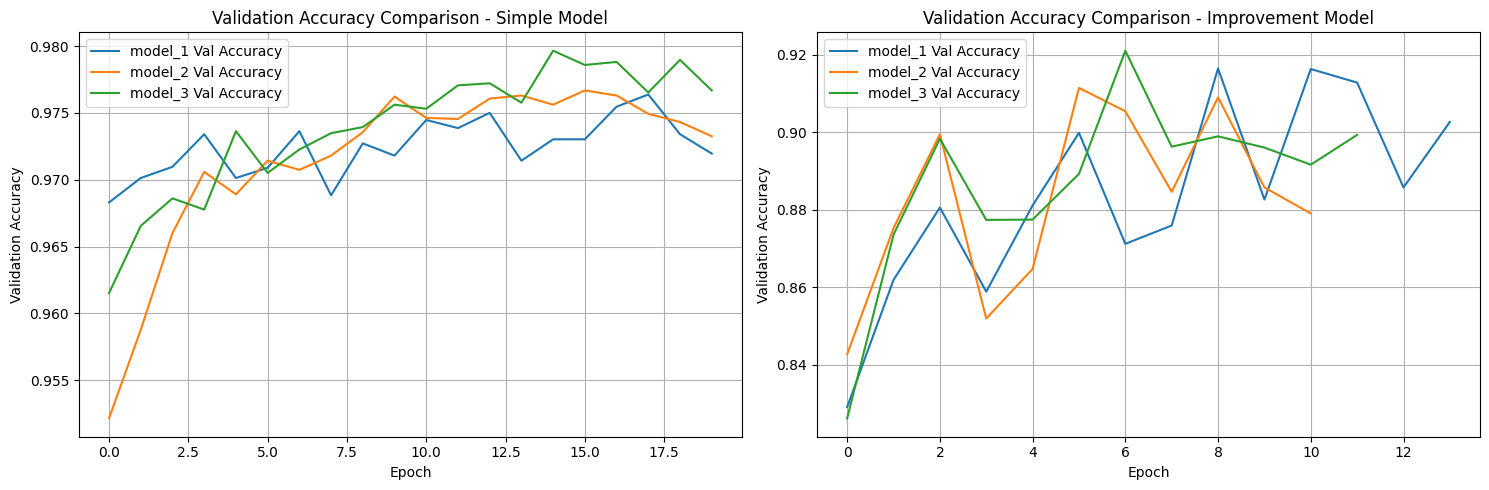

In [67]:
def compare_models_acu(history_dict1, history_dict2):
    plt.figure(figsize=(15, 5))

    # Plot first subplot for the first history dictionary
    plt.subplot(1, 2, 1)
    for key in history_dict1:
        plt.plot(history_dict1[key]['val_accuracy'], label=f'{key} Val Accuracy')
    plt.title('Validation Accuracy Comparison - Simple Model')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Plot second subplot for the second history dictionary
    plt.subplot(1, 2, 2)
    for key in history_dict2:
        plt.plot(history_dict2[key]['val_accuracy'], label=f'{key} Val Accuracy')
    plt.title('Validation Accuracy Comparison - Improvement Model')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

compare_models_acu(simple_model_history_dict, improvement_simple_history_dict)

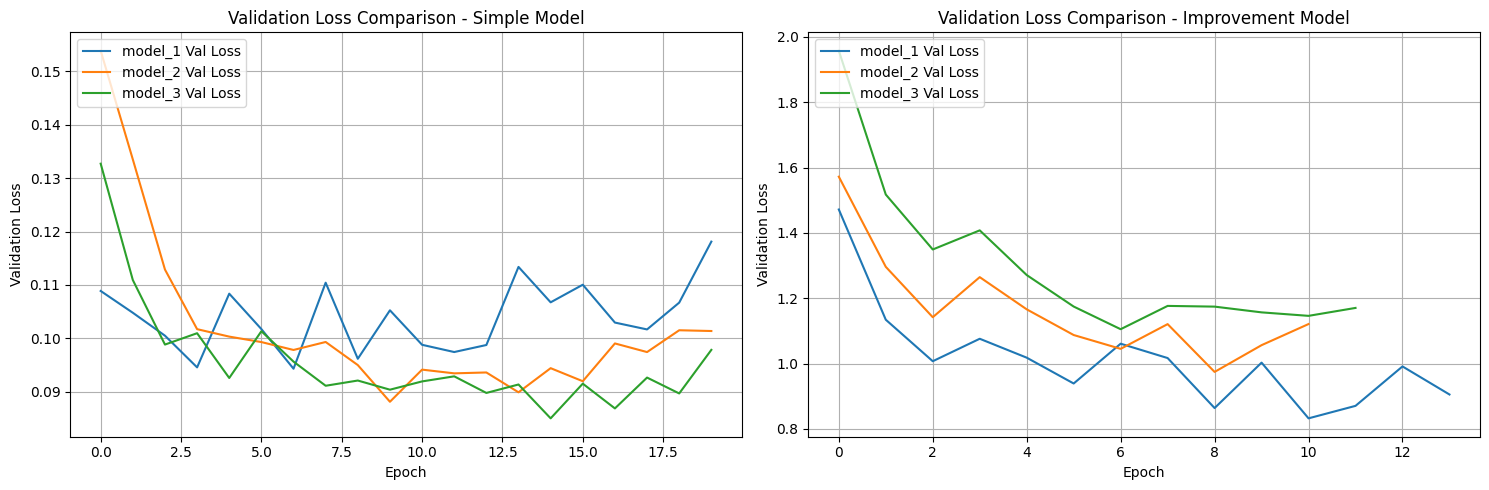

In [68]:
def compare_models_loss(history_dict1, history_dict2):
    plt.figure(figsize=(15, 5))

    # Plot first subplot for the first history dictionary
    plt.subplot(1, 2, 1)
    for key in history_dict1:
        plt.plot(history_dict1[key]['val_loss'], label=f'{key} Val Loss')
    plt.title('Validation Loss Comparison - Simple Model')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Plot second subplot for the second history dictionary
    plt.subplot(1, 2, 2)
    for key in history_dict2:
        plt.plot(history_dict2[key]['val_loss'], label=f'{key} Val Loss')
    plt.title('Validation Loss Comparison - Improvement Model')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

compare_models_loss(simple_model_history_dict, improvement_simple_history_dict)

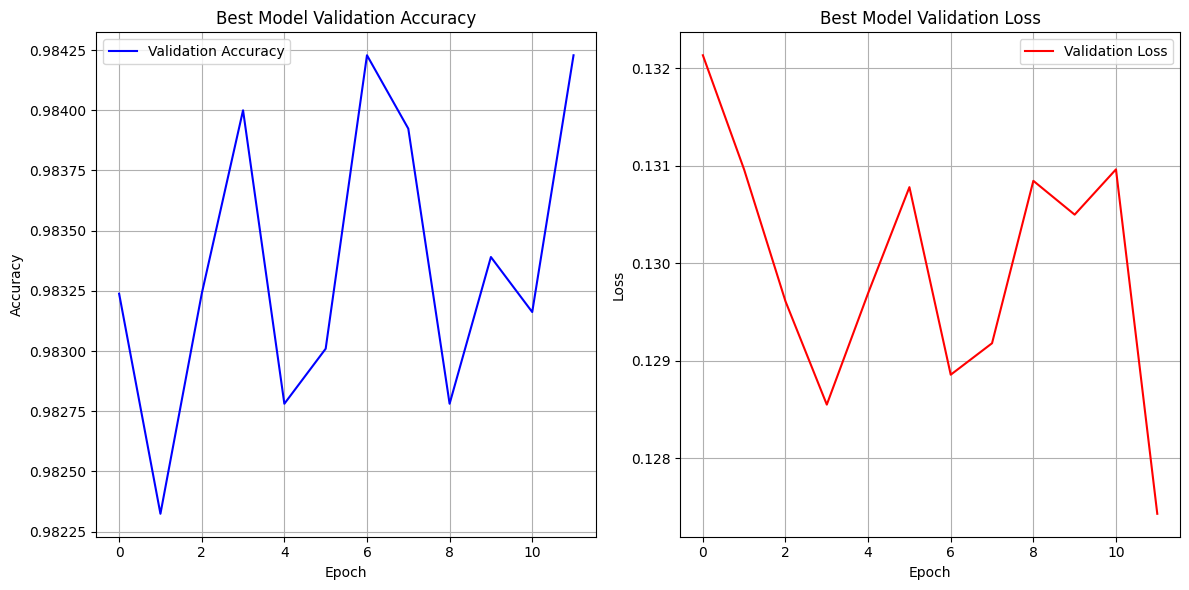

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot validation accuracy
plt.subplot(1, 2, 1)
plt.plot(best_model_val_accuracy, label='Validation Accuracy', color='blue')
plt.title('Best Model Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(best_model_val_loss, label='Validation Loss', color='red')
plt.title('Best Model Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

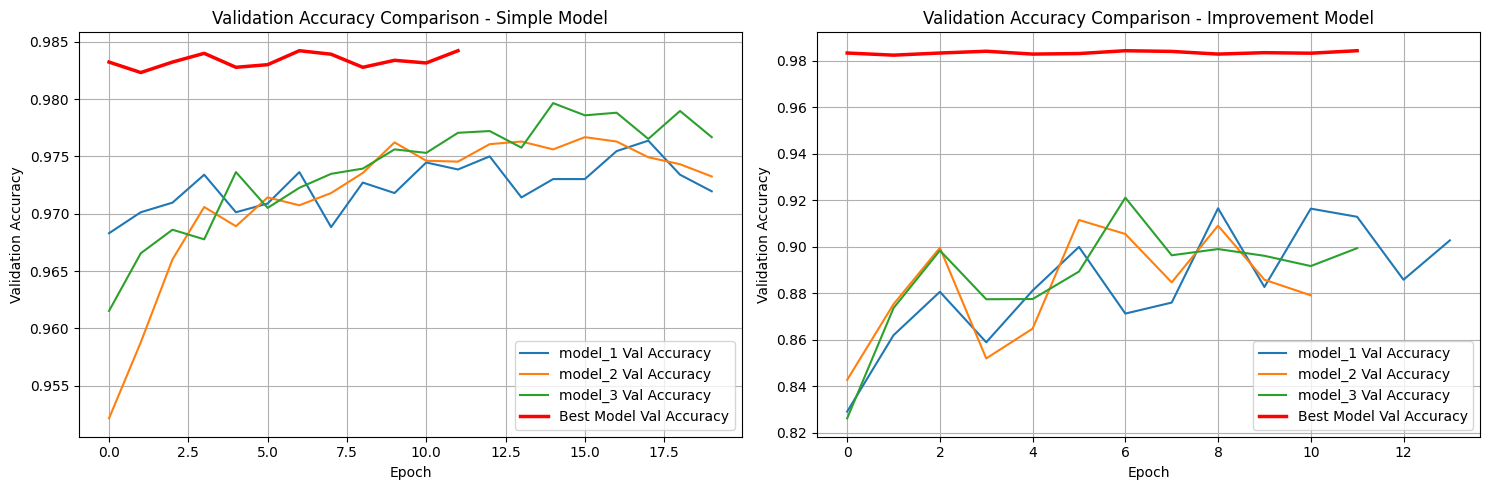

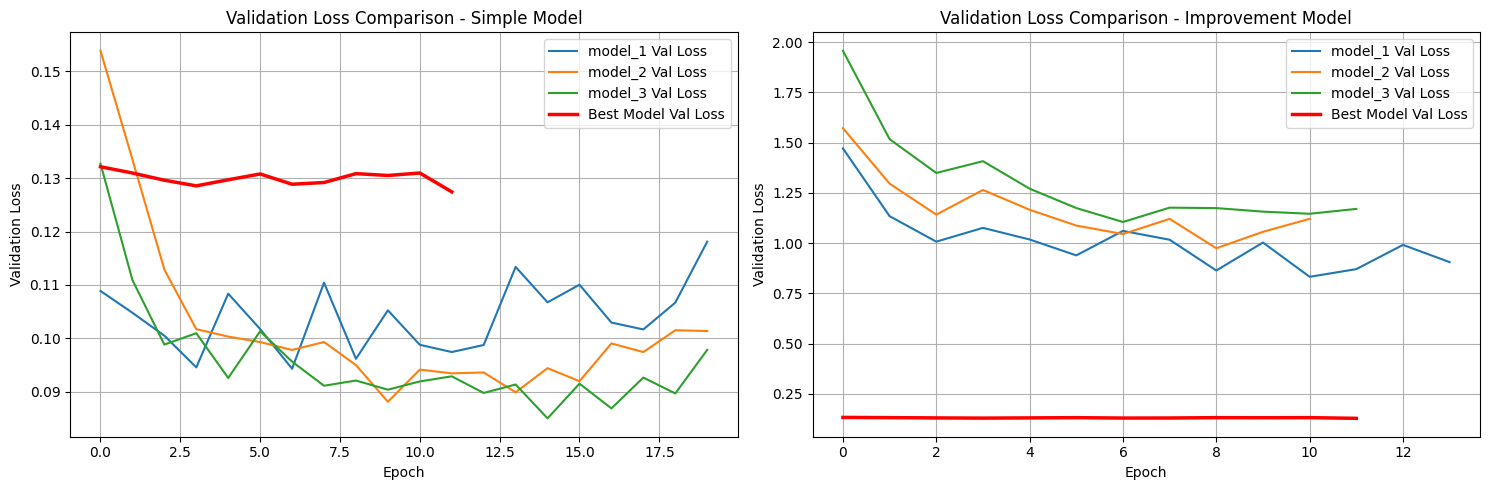

In [128]:
import matplotlib.pyplot as plt

def compare_models_accuracy(history_dict1, history_dict2, best_model_val_accuracy):
    plt.figure(figsize=(15, 5))

    # Plot first subplot for the first history dictionary
    plt.subplot(1, 2, 1)
    for key in history_dict1:
        plt.plot(history_dict1[key]['val_accuracy'], label=f'{key} Val Accuracy')
    plt.plot(best_model_val_accuracy, label='Best Model Val Accuracy', color='red', linewidth=2.5)
    plt.title('Validation Accuracy Comparison - Simple Model')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Plot second subplot for the second history dictionary
    plt.subplot(1, 2, 2)
    for key in history_dict2:
        plt.plot(history_dict2[key]['val_accuracy'], label=f'{key} Val Accuracy')
    plt.plot(best_model_val_accuracy, label='Best Model Val Accuracy', color='red', linewidth=2.5)
    plt.title('Validation Accuracy Comparison - Improvement Model')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

def compare_models_loss(history_dict1, history_dict2, best_model_val_loss):
    plt.figure(figsize=(15, 5))

    # Plot first subplot for the first history dictionary
    plt.subplot(1, 2, 1)
    for key in history_dict1:
        plt.plot(history_dict1[key]['val_loss'], label=f'{key} Val Loss')
    plt.plot(best_model_val_loss, label='Best Model Val Loss', color='red', linewidth=2.5)
    plt.title('Validation Loss Comparison - Simple Model')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Plot second subplot for the second history dictionary
    plt.subplot(1, 2, 2)
    for key in history_dict2:
        plt.plot(history_dict2[key]['val_loss'], label=f'{key} Val Loss')
    plt.plot(best_model_val_loss, label='Best Model Val Loss', color='red', linewidth=2.5)
    plt.title('Validation Loss Comparison - Improvement Model')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

compare_models_accuracy(simple_model_history_dict, improvement_simple_history_dict, best_model_val_accuracy)
compare_models_loss(simple_model_history_dict, improvement_simple_history_dict, best_model_val_loss)

In [123]:
# To standardize y-axis values

max_val_accuracy_simple = max(max(history['val_accuracy']) for key, history in simple_model_history_dict.items())
min_val_accuracy_simple = min(min(history['val_accuracy']) for key, history in simple_model_history_dict.items())

max_val_loss_simple = max(max(history['val_loss']) for key, history in simple_model_history_dict.items())
min_val_loss_simple = min(min(history['val_loss']) for key, history in simple_model_history_dict.items())

max_val_accuracy_improvement = max(max(history['val_accuracy']) for key, history in improvement_simple_history_dict.items())
min_val_accuracy_improvement = min(min(history['val_accuracy']) for key, history in improvement_simple_history_dict.items())

max_val_loss_improvement = max(max(history['val_loss']) for key, history in improvement_simple_history_dict.items())
min_val_loss_improvement = min(min(history['val_loss']) for key, history in improvement_simple_history_dict.items())

max_val_accuracy_best_model = max(best_model_history.history['val_accuracy'])
min_val_accuracy_best_model = min(best_model_history.history['val_accuracy'])

max_val_loss_best_model = max(best_model_history.history['val_loss'])
min_val_loss_best_model = min(best_model_history.history['val_loss'])


max_val_accuracy = max(
  max_val_accuracy_simple, max_val_accuracy_improvement, max_val_loss_best_model
)+0.1

min_val_accuracy = min(
  min_val_accuracy_simple, min_val_accuracy_improvement, min_val_loss_best_model
)-0.1

max_val_loss = max(
  max_val_loss_simple, max_val_loss_improvement, max_val_loss_best_model
)+0.1

min_val_loss = min(
  min_val_loss_simple, min_val_loss_improvement, min_val_loss_best_model
)-0.1

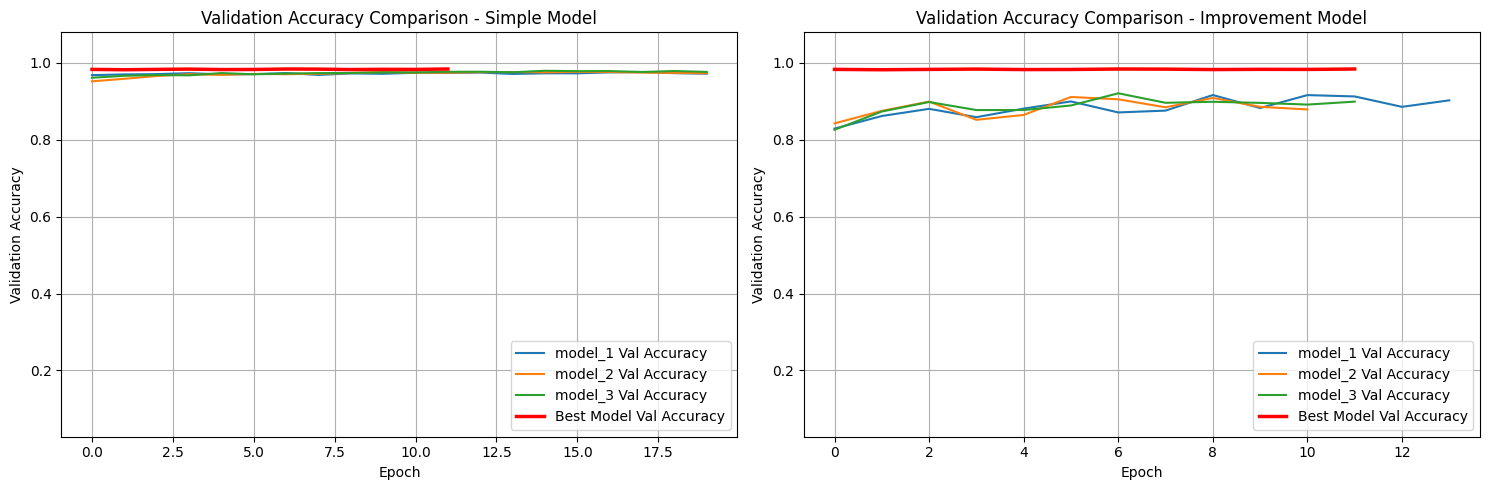

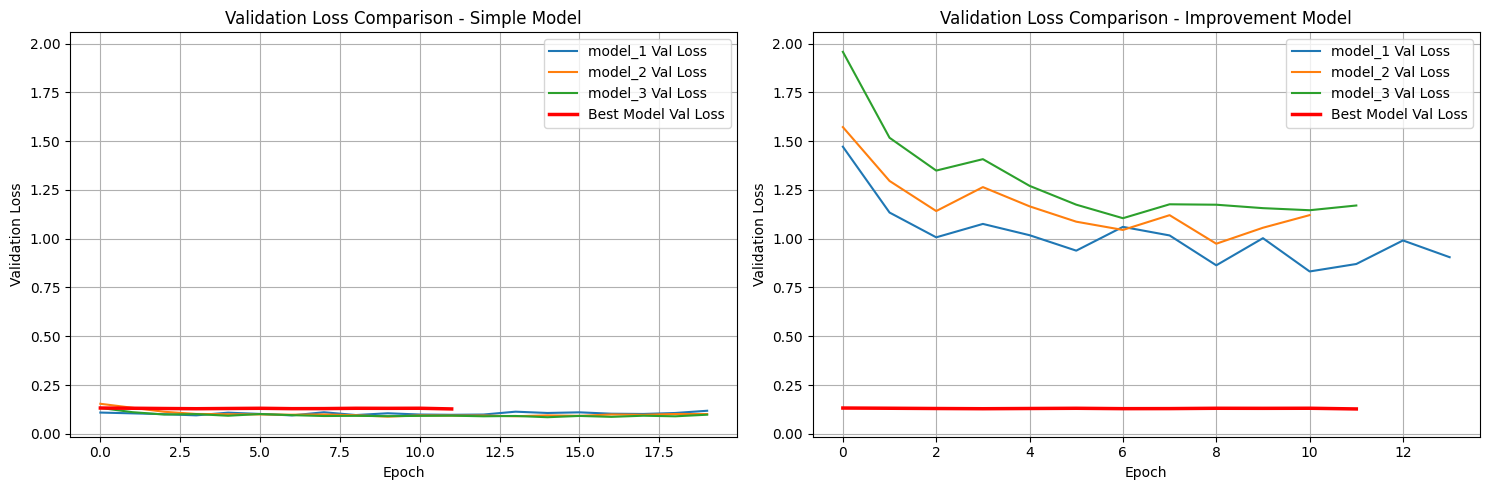

In [127]:
import matplotlib.pyplot as plt

def compare_models_accuracy(history_dict1, history_dict2, best_model_val_accuracy, max_val_accuracy, min_val_accuracy):
    plt.figure(figsize=(15, 5))

    # Plot first subplot for the first history dictionary
    plt.subplot(1, 2, 1)
    for key in history_dict1:
        plt.plot(history_dict1[key]['val_accuracy'], label=f'{key} Val Accuracy')
    plt.plot(best_model_val_accuracy, label='Best Model Val Accuracy', color='red', linewidth=2.5)
    plt.title('Validation Accuracy Comparison - Simple Model')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.ylim(min_val_accuracy, max_val_accuracy)
    plt.grid(True)

    # Plot second subplot for the second history dictionary
    plt.subplot(1, 2, 2)
    for key in history_dict2:
        plt.plot(history_dict2[key]['val_accuracy'], label=f'{key} Val Accuracy')
    plt.plot(best_model_val_accuracy, label='Best Model Val Accuracy', color='red', linewidth=2.5)
    plt.title('Validation Accuracy Comparison - Improvement Model')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.ylim(min_val_accuracy, max_val_accuracy)
    plt.grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

def compare_models_loss(history_dict1, history_dict2, best_model_val_loss, max_val_loss, min_val_loss):
    plt.figure(figsize=(15, 5))

    # Plot first subplot for the first history dictionary
    plt.subplot(1, 2, 1)
    for key in history_dict1:
        plt.plot(history_dict1[key]['val_loss'], label=f'{key} Val Loss')
    plt.plot(best_model_val_loss, label='Best Model Val Loss', color='red', linewidth=2.5)
    plt.title('Validation Loss Comparison - Simple Model')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.ylim(min_val_loss, max_val_loss)
    plt.grid(True)

    # Plot second subplot for the second history dictionary
    plt.subplot(1, 2, 2)
    for key in history_dict2:
        plt.plot(history_dict2[key]['val_loss'], label=f'{key} Val Loss')
    plt.plot(best_model_val_loss, label='Best Model Val Loss', color='red', linewidth=2.5)
    plt.title('Validation Loss Comparison - Improvement Model')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.ylim(min_val_loss, max_val_loss)
    plt.grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

compare_models_accuracy(simple_model_history_dict, improvement_simple_history_dict, best_model_history.history['val_accuracy'], max_val_accuracy, min_val_accuracy)
compare_models_loss(simple_model_history_dict, improvement_simple_history_dict, best_model_history.history['val_loss'], max_val_loss, min_val_loss)

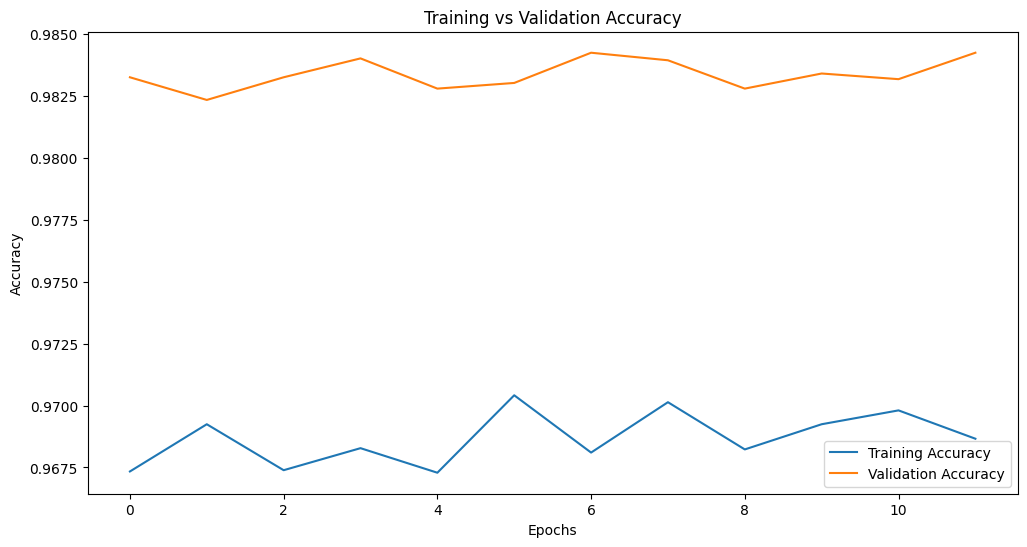

In [136]:
history = best_model_history.history

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()